We use glorot(Xavior) intialization in case of sigmoid and tanh activations

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

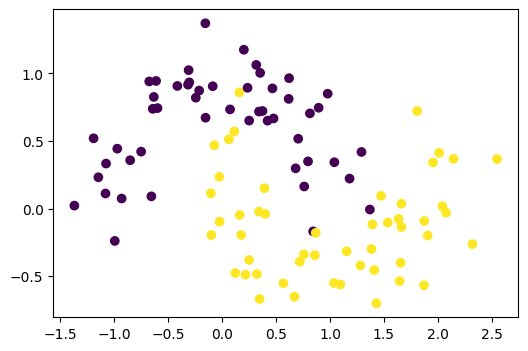

In [15]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)

plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y) 
plt.show()

# 1. Glorot uniform weight initialization

In [16]:
from tensorflow.keras import layers, models, initializers

model = models.Sequential()
model.add(layers.Input(shape = (2,)))  #input layer
model.add(layers.Dense(
    units=10, 
    activation='sigmoid',
    kernel_initializer="glorot_uniform" # by default all weights are initialized using glorot uniform
))
model.add(layers.Dense(
    units=10, 
    activation='sigmoid',
    kernel_initializer="glorot_uniform" 
))
model.add(layers.Dense(
    units=1, 
    activation='sigmoid',
    kernel_initializer="glorot_uniform"
))

In [17]:
# weights before training
model.get_weights()

[array([[ 0.40096384,  0.4211715 , -0.6713602 , -0.5216175 , -0.26299128,
         -0.4686829 , -0.56769526, -0.33252177,  0.1424216 ,  0.2928378 ],
        [-0.6466727 ,  0.560227  , -0.52556986,  0.57574683,  0.18771213,
         -0.40404835, -0.18846822,  0.4467247 ,  0.57523435, -0.09407258]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 3.64744544e-01,  3.75369608e-01,  4.73082066e-01,
         -5.42146921e-01, -4.73865837e-01, -3.54797184e-01,
         -5.13878405e-01,  3.01400065e-01, -4.63259935e-01,
         -2.70440936e-01],
        [-4.72952634e-01, -4.54738736e-01,  5.00917435e-04,
          1.44158006e-01, -3.44819129e-01,  3.18826675e-01,
         -4.63838309e-01, -9.76686776e-02,  3.72483015e-01,
         -3.46150219e-01],
        [ 2.27373421e-01,  2.39530802e-02,  4.70506787e-01,
         -3.17652404e-01, -6.27791584e-02, -3.08794141e-01,
         -2.74863154e-01, -1.58978105e-02, -5.02450466e-01,
         -1.3929843

In [19]:
# training the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2, verbose = 0)

In [20]:
model.get_weights()

[array([[ 0.28726763,  0.78289855, -1.0196859 , -0.8959914 , -0.6435926 ,
         -0.8224685 , -0.9188168 , -0.66241413,  0.47685766,  0.69899833],
        [-0.53292584,  0.1610236 , -0.13910116,  0.99596983,  0.6033943 ,
         -0.0159201 ,  0.21318726,  0.82060385,  0.21261385, -0.5395556 ]],
       dtype=float32),
 array([ 0.04499386, -0.02103245,  0.07108191,  0.01539703,  0.02669419,
         0.04542276, -0.0834152 , -0.0685446 ,  0.00034271, -0.06266631],
       dtype=float32),
 array([[ 0.14465514,  0.6107024 ,  0.22242264, -0.23796104, -0.22769116,
         -0.09674577, -0.73684615,  0.05858367, -0.23523049, -0.53145885],
        [-0.5492312 , -0.36310452, -0.11224036,  0.31060058, -0.24235481,
          0.44177932, -0.5388315 , -0.20158286,  0.4521648 , -0.4840179 ],
        [ 0.45858738, -0.19165115,  0.666672  , -0.5206569 , -0.281475  ,
         -0.49519867, -0.04255823,  0.17848352, -0.7249222 ,  0.16764104],
        [-0.0332194 , -0.01947033,  0.5761484 , -0.8729143 , 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step


<Axes: >

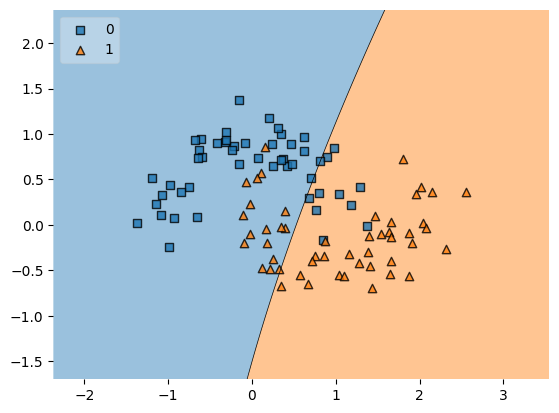

In [21]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

# 2. Glorot normal weight initialization

In [22]:
from tensorflow.keras import layers, models, initializers

model = models.Sequential()
model.add(layers.Input(shape = (2,)))  #input layer
model.add(layers.Dense(
    units=10, 
    activation='sigmoid',
    kernel_initializer="glorot_normal"
))
model.add(layers.Dense(
    units=10, 
    activation='sigmoid',
    kernel_initializer="glorot_normal" 
))
model.add(layers.Dense(
    units=1, 
    activation='sigmoid',
    kernel_initializer="glorot_normal"
))

In [23]:
# training the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2, verbose = 0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

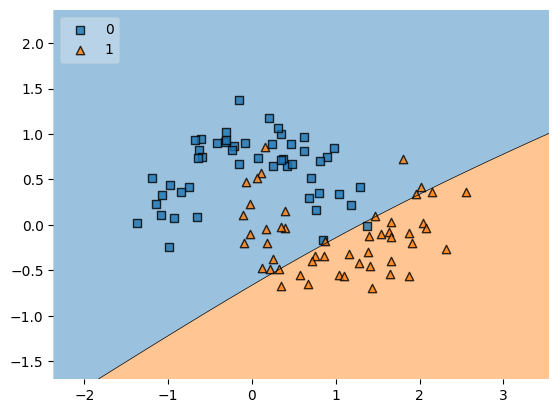

In [24]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [ ]:
# in given dataset glorot normal is working better for small no of epochs